In [1]:
# Import Relevant Libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


sns.set()

In [2]:
# Read the cleaned data 
cleaned_data = pd.read_csv('Datasets/Insurance_cleaned.csv')

In [3]:
data = cleaned_data.copy()

# drop index
data = data.drop(['Unnamed: 0'], axis=1)
data.reset_index(drop=True, inplace=True)

data.head()

,Year of Observation,Insurance Period,Residential,Building Painted,Building Fenced,Garden,Settlement,Building Dimension,Building Type,Date Of Occupancy,Number of Windows,Geo Code,Claim
0,2013-01-01,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,290,1,1960,4,1053,0
1,2015-01-01,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,490,1,1850,4,1053,0
2,2014-01-01,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,595,1,1960,4,1053,0
3,2013-01-01,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,2840,1,1960,4,1053,0
4,2014-01-01,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,680,1,1800,3,1053,0


In [4]:
data.tail()

,Year of Observation,Insurance Period,Residential,Building Painted,Building Fenced,Garden,Settlement,Building Dimension,Building Type,Date Of Occupancy,Number of Windows,Geo Code,Claim
7143,2012-01-01,6 Months - 1 Year,1,Not Painted,Not Fenced,Has Garden,Urban area,1819,1,2001,4,6088,0
7144,2013-01-01,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,2,1980,4,6088,1
7145,2016-01-01,0 - 5 Months,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,1,1992,4,6088,0
7146,2013-01-01,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,1,1972,4,6088,0
7147,2014-01-01,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,1,2004,4,6088,0


In [5]:
# descriptives 
data.describe()

,Residential,Building Dimension,Building Type,Date Of Occupancy,Number of Windows,Claim
count,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000
mean,0.305400,1882.147454,2.186626,1964.118215,4.167040,0.228316
std,0.460609,2261.963222,0.941186,34.738361,1.295154,0.419776
min,0.000000,1.000000,1.000000,1545.000000,1.000000,0.000000
25%,0.000000,530.000000,2.000000,1960.000000,4.000000,0.000000
50%,0.000000,1100.000000,2.000000,1960.000000,4.000000,0.000000
75%,1.000000,2250.000000,3.000000,1980.000000,4.000000,0.000000
max,1.000000,20940.000000,4.000000,2016.000000,10.000000,1.000000


# Exploratory Data Analysis


Hypothesis 

1. Does Fenced Building Claim Insurance than Building Not Fenced?
2. Does Longer Insurance Period Claim Insurance than shorter Period?
3. what is the Percentage of Insurance Claim in Rural areas and Urban areas?
4. What is the Trend of insurance made over the years?
5. Does Residential Properties have longer Insurance Period?
6. check if our targets variable is balanced? 

# Does Number of Insurance made increase over the year of observation?

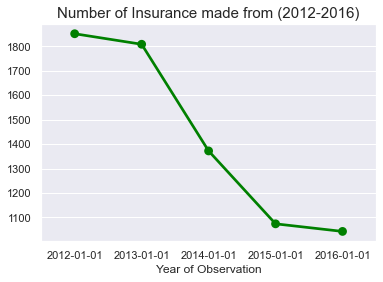

In [6]:
Year_of_observation = data['Year of Observation'].value_counts()

sns.pointplot(x=Year_of_observation.index, y=Year_of_observation.values,color='green')
plt.title("Number of Insurance made from (2012-2016)",fontsize=15)
plt.xlabel("Year of Observation")

plt.show()

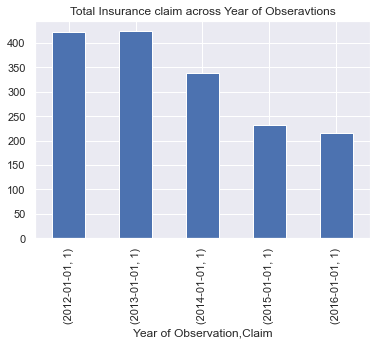

In [7]:
data[data['Claim'] == 1].groupby('Year of Observation')['Claim'].value_counts().plot(kind='bar', 
                                                                    title= 'Total Insurance claim across Year of Obseravtions')
plt.show()

In [8]:
df_0 = pd.DataFrame(data.groupby('Year of Observation')[['Claim','Year of Observation']].value_counts(), columns=['Counts'])
df_0 = df_0.reset_index()

df_0_pivot = df_0.pivot(values = 'Counts', index='Year of Observation', columns=['Claim'])
df_0_pivot['sum'] = df_0_pivot[0] + df_0_pivot[1]
df_0_pivot['Not Claimed %'] = (df_0_pivot[0]/df_0_pivot['sum'])*100
df_0_pivot['Claimed %'] =  (df_0_pivot[1]/df_0_pivot['sum'])*100

df_0_pivot

Claim,0,1,sum,Not Claimed %,Claimed %
Year of Observation,,,,,
2012-01-01,1429,422,1851,77.201513,22.798487
2013-01-01,1384,424,1808,76.548673,23.451327
2014-01-01,1033,339,1372,75.291545,24.708455
2015-01-01,842,232,1074,78.398510,21.601490
2016-01-01,828,215,1043,79.386385,20.613615


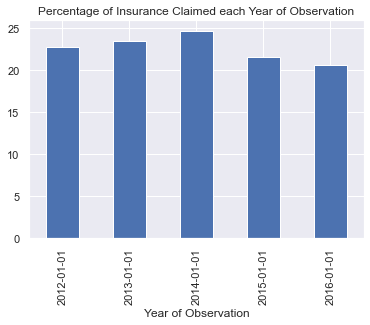

In [9]:
df_0_pivot['Claimed %'].plot(kind='bar',title = 'Percentage of Insurance Claimed each Year of Observation')

plt.show()

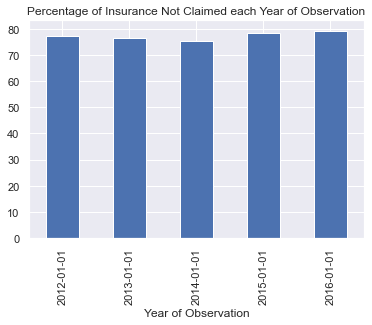

In [10]:
df_0_pivot['Not Claimed %'].plot(kind='bar',title = 'Percentage of Insurance Not Claimed each Year of Observation')

plt.show()

# Is the targets variable is balanced?

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


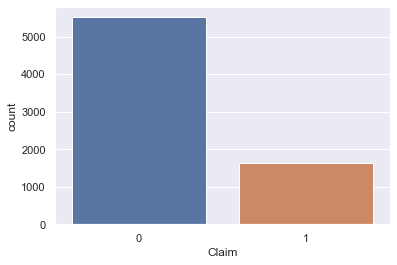

In [11]:
sns.countplot(data['Claim'])

plt.show()

This Claim column consists of the Insurance Claimed and Not Claimed and the Countplot above visualizes the amount of Insurance Claimed and Not Claimed.
Majority of the Insurance happens not to be claimed leaving Insurance Claimed to be the Minority.

Why are Majority of the Insurance Not Claimed?
This Plot only shows us the majority, to gain futher insight about the Insurance Not Claimed 
we'd have to check for what Claimed and non claimed insurance consists by comparing with other variables.

# Does Fenced Building Claim Insurance than Building Not Fenced?

In [12]:
# Visualize the Insurance Claimed between Fenced Building and Not Fenced Building 

Fenced_gb = data.groupby('Building Fenced')[['Claim','Building Fenced']].value_counts()
df_1 = pd.DataFrame({'Building Type': ['Fenced','Not Fenced'],'Claimed':[901,731], 'Not Claimed':[3531,5032]})

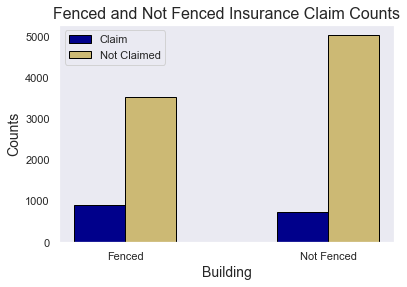

In [13]:
#plot the bar chart
n = len(df_1)
r = np.arange(n)
width = 0.25

plt.bar(r,df_1['Claimed'], color = 'darkblue',
       width = width, edgecolor = 'black',label='Claim')
plt.bar(r + width,df_1['Not Claimed'], color='y',
       width = width, edgecolor = 'black',label='Not Claimed')

plt.xlabel('Building',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Fenced and Not Fenced Insurance Claim Counts',fontsize = 16)
plt.grid(False)
plt.xticks(r + width/2,['Fenced','Not Fenced'])
plt.legend()

plt.show()


In [14]:
df_1['Claimed %'] = (df_1['Claimed']/df_1['Claimed'].sum())*100
df_1['Not Claimed %'] = (df_1['Not Claimed']/df_1['Not Claimed'].sum())*100
df_1

,Building Type,Claimed,Not Claimed,Claimed %,Not Claimed %
0,Fenced,901,3531,55.208333,41.235548
1,Not Fenced,731,5032,44.791667,58.764452


According to the visuals 
Fenced Building does have higher insurance claim than Building Not Fenced 
The Bar chat also implies that whether a Building is fenced or not, it is not a strong determinant of insurance Claim

# Does Longer Insurance Period Claim Insurance than shorter Period?

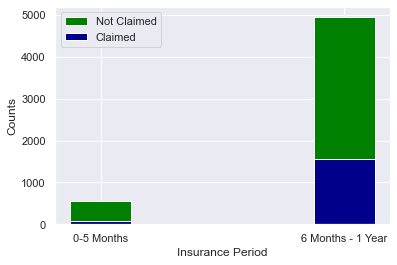

In [15]:
# Insurance Claim Period 

df_2 = pd.DataFrame(data.groupby('Insurance Period')[['Claim','Insurance Period']].value_counts(), columns=["Counts"])
df_2 = df_2.reset_index()
df_pivot = df_2.pivot(index='Insurance Period', values ='Counts', columns=['Claim'])

n = len(df_pivot)
r = range(n)
width = 0.25


plt.bar(r,df_pivot.loc[:,0], color='green', 
       width=width,label="Not Claimed")
plt.bar(r,df_pivot.loc[:,1], color='darkblue',
       width=width, label="Claimed")
plt.xlabel("Insurance Period")
plt.ylabel("Counts")
plt.xticks(r, ['0-5 Months','6 Months - 1 Year'])
plt.legend()

plt.show()


The Insurance period doesn't really explains much on the Insurance Claim
but rather shows that Majority of the insurance made are six months upwards

# what is the Percentage of Insurance Claim in Rural areas and Urban areas?

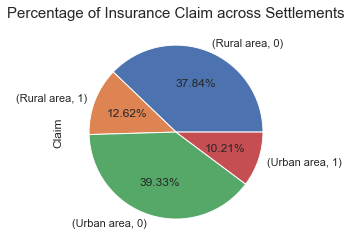

In [16]:
data.groupby('Settlement')['Claim'].value_counts().plot(kind= "pie",autopct="%1.2f%%")
plt.title("Percentage of Insurance Claim across Settlements",fontsize=15)

plt.show()

# Does Residential Properties have longer Insurance Period?

In [17]:
df_5 = pd.DataFrame(data.groupby('Insurance Period')[['Insurance Period','Residential']].value_counts(),columns=['Counts'])
df_5 = df_5.reset_index()

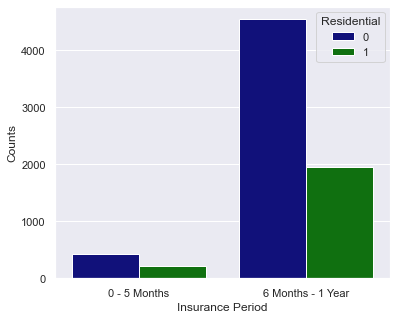

In [18]:
plt.figure(figsize=(6,5))

sns.barplot(data=df_5, x='Insurance Period', y= 'Counts',hue="Residential",palette = ['darkblue','green'] )

plt.show()

In [19]:
# plot insured period of residential and non residential properties 

Groupby = pd.DataFrame(data.groupby('Insurance Period')['Residential'].value_counts(),
                      
                      )
Groupby.rename(columns={'Residential':'Counts'},inplace=True)
Groupby.reset_index(inplace=True)

residential = Groupby[Groupby['Residential'] == 1]
non_residential = Groupby[Groupby['Residential'] == 0]


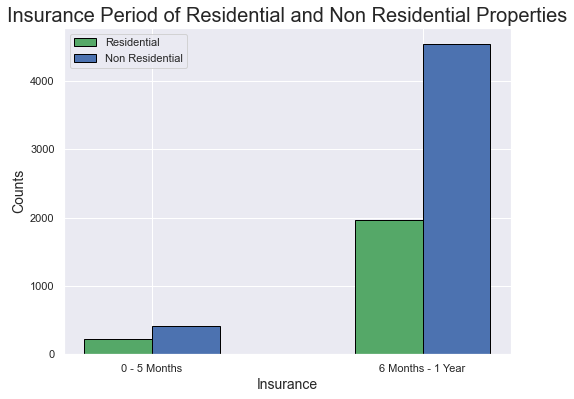

In [20]:
n = len(residential['Counts'])
r = np.arange(n)
width = 0.25

plt.figure(figsize=(8,6))

plt.bar(r,residential['Counts'], color='g',
       width = width, edgecolor = 'black',label='Residential')
plt.bar(r + width,non_residential['Counts'], color='b',
       width = width, edgecolor = 'black',label='Non Residential')

plt.xlabel('Insurance',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Insurance Period of Residential and Non Residential Properties',fontsize = 20)

plt.xticks(r + width/2,['0 - 5 Months','6 Months - 1 Year'])
plt.legend()

plt.show()

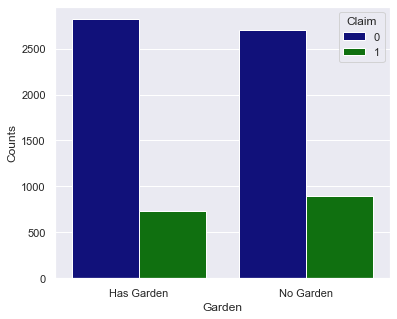

In [21]:
df_6 = pd.DataFrame(data.groupby('Garden')[['Claim','Garden']].value_counts(),columns=['Counts'])
df_6 = df_6.reset_index()

plt.figure(figsize=(6,5))

sns.barplot(data=df_6, x='Garden', y= 'Counts',hue="Claim",palette = ['darkblue','green'] )

plt.show()

# Conclusion

In [22]:
Based on the brief analysis done on this Insurance dataset to discover the catergorical variables that contributes most to the target variable 
(claimed & Not claimed).

We were able to discover that the insurance made declines as the year passes by 


SyntaxError: invalid syntax (4080750429.py, line 1)